#Estimating $\pi$ using the Monte Carlo Method


The ratio of a circle's circumference to its diameter is: $\pi = \frac{C}{d}$. We want to estimate the value of $\pi$ by using random sampling instead of formulas.

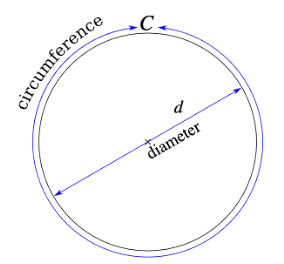

*  Draw a square of side length 2, spanning from -1 to +1: in both x and y directions ==> Square area = 2 × 2 = 4

*   Inside that square, draw a circle of radius R=1 centered at (0,0) ==> Circle area = π × r² = π × 1² = π

So the circle takes up π/4 of the square's area.

If you throw points randomly into the square:

*   Some will land inside the circle

*   Others will land outside

Because the points are random, the fraction of points that fall inside the circle will be close to the ratio of the areas:
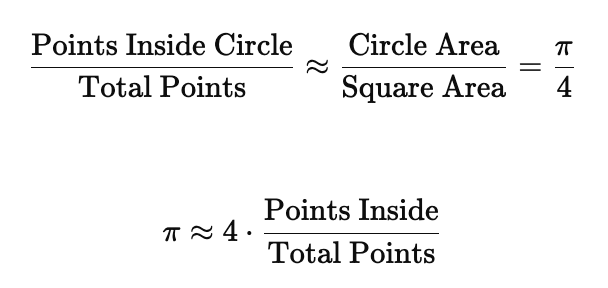
	​
*  Generate many random points (x, y) with: x ∈ [-1, 1] and y ∈ [-1, 1]
*  Check if each point is inside the circle. A point is inside the circle if: $𝑥^2+y^2\le 1$

* Count: inside = number of points where x² + y² ≤ 1
* Count: total = total number of points
* Estimate $\pi \simeq 4 \times inside/total$


#Why It Works

More points → better approximation.

This is based on the Law of Large Numbers:
When sample size grows, the estimate converges to the true value.

Use of the interact function (ipywidgets.interact) automatically creates user interface (UI) controls for exploring code and data interactively. It is the easiest way to get started using IPython’s widgets:
*  interact: at the most basic level, interact autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use interact, you need to define a function that you want to explore. Here is a function monte_carlo_dual(n_points) - https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
*  IntSlider: The slider is displayed with a specified, initial value. **Lower and upper bounds are defined by min and max, and the value can be incremented according to the step parameter**. The slider’s label is defined by description parameter. The slider’s orientation is either **‘horizontal’** (default) or **‘vertical’**. **‘readout’** displays the current value of the slider next to it and the options are True (default) or False. The default is ‘.2f’ -  https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Jupyter-friendly settings (optional)
%matplotlib inline
# Generate a large batch of random points once (fast!)
N_MAX = 50000

def monte_carlo_dual(n_points):
    if n_points < 10:
        n_points = 10

    x = xs[:n_points]
    y = ys[:n_points]
    ins = inside[:n_points]
    pi_estimates = 4 * np.cumsum(ins) / np.arange(1, n_points+1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    # Left: Scatter
    ax1.scatter(x[ins], y[ins], s=4)
    ax1.scatter(x[~ins], y[~ins], s=4)
    theta = np.linspace(0, 2*np.pi, 300)
    ax1.plot(np.cos(theta), np.sin(theta))
    ax1.set_aspect("equal", adjustable="box")
    ax1.set_xlim(-1,1)
    ax1.set_ylim(-1,1)
    ax1.set_title("Points in Unit Circle")

    # Right: Convergence
    ax2.plot(pi_estimates)
    ax2.axhline(np.pi)
    ax2.set_title("Convergence of π Estimate")
    ax2.set_xlabel("Number of Samples")
    ax2.set_ylabel("π Estimate")

    fig.suptitle(f"n = {n_points},  π ≈ {pi_estimates[-1]:.6f}", fontsize=14)
    plt.show()

interact(monte_carlo_dual, n_points = IntSlider(min=1000, max=N_MAX, step=1000, value=5000));


interactive(children=(IntSlider(value=5000, description='n_points', max=50000, min=100, step=100), Output()), …